In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [3]:
plt.style.use('fivethirtyeight')

In [4]:
# this magic line makes all your plots appear in the notebook! (inline)
%matplotlib inline

## Example 1: Finding the most dangerous hour of day in Philadelphia

The dataset I used can be downloaded here:
https://www.opendataphilly.org/dataset/crime-incidents/resource/d6369e07-da6d-401b-bf6e-93fdfacdf24d
It's a record of all the crime that's occurred in Philly this year.

In [5]:
crime_data = pd.read_csv('/Users/naomi/Downloads/cartodb-query.csv')
crime_data.head()

,cartodb_id,the_geom,the_geom_webmercator,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour_,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,shape
0,1,0101000020E6100000F8EEE23F15CB52C0EE0F10A3D2F6...,0101000020110F0000C5A766CE1BEC5FC141FEBD3CBA85...,340,1,1,2015-12-17 07:26:00,2015-12-17,07:26:00,7,201501056051,1800 BLOCK S CHADWICK ST,1400,Vandalism/Criminal Mischief,-75.173172,39.928303,POINT(-75.17317197 39.92830313)
1,2,0101000020E61000007A4F69ED0BCB52C06E9C1C5786F6...,0101000020110F0000F89FBBF80BEC5FC1C77C11BD6585...,341,1,1,2015-12-17 11:04:00,2015-12-17,11:04:00,11,201501056080,1500 BLOCK MC KEAN ST,1400,Vandalism/Criminal Mischief,-75.172603,39.925975,POINT(-75.17260299 39.92597474)
2,3,0101000020E6100000D3C89D8834CB52C0D5E3A5381AF6...,0101000020110F0000A9DC08F250EC5FC160256000EE84...,342,1,1,2015-12-18 22:55:00,2015-12-18,22:55:00,22,201501056360,2200 BLOCK S 17TH ST,1400,Vandalism/Criminal Mischief,-75.175081,39.922675,POINT(-75.1750814 39.92267521)
3,4,0101000020E6100000E51F85042FCB52C058F92B853CF6...,0101000020110F00008468729347EC5FC1E25B43FC1385...,343,1,1,2015-12-19 00:54:00,2015-12-19,00:54:00,0,201501056375,2200 BLOCK S 17TH ST,1400,Vandalism/Criminal Mischief,-75.174745,39.923722,POINT(-75.17474473 39.92372193)
4,5,0101000020E61000007CD13F3D0DCB52C04961410E88F6...,0101000020110F00005BFA2F330EEC5FC18DA369A36785...,344,1,1,2015-12-20 01:07:00,2015-12-20,01:07:00,1,201501056502,S 16TH ST / MC KEAN ST,1400,Vandalism/Criminal Mischief,-75.172683,39.926027,POINT(-75.17268306 39.92602709)


In [6]:
# create a pivot table to count the number of rows per hour of day
count_table = crime_data.pivot_table('dc_key', index = 'hour_', aggfunc = 'count')
count_table.head()

,dc_key
hour_,
0,28
1,18
2,24
3,11
4,10


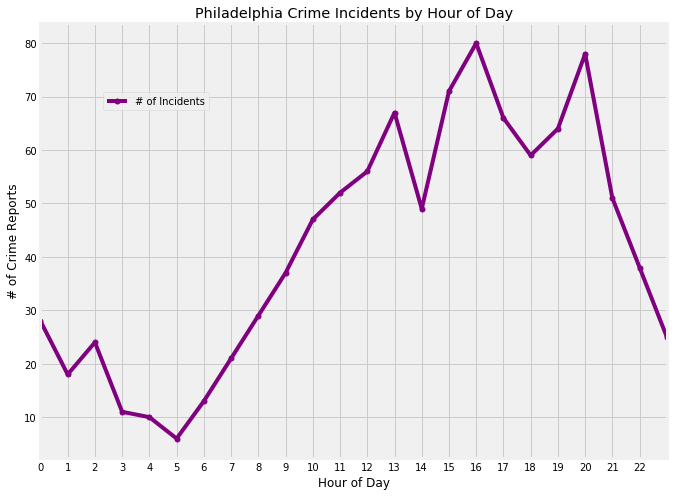

In [7]:
#size the figure
plt.figure(figsize=(10,8))

# make a line graph
plt.plot(count_table, 'o-', markersize = 5, label = '# of Incidents', color = 'purple')
plt.legend(loc = (0.1, 0.8))

# give the graph a title
plt.title('Philadelphia Crime Incidents by Hour of Day')

# label the axes
plt.xlabel('Hour of Day')
plt.ylabel('# of Crime Reports')

#specify the axis. both limits and the tick marks
plt.xlim(0, 23)
_ = plt.xticks(np.arange(0, 23, 1))

In [8]:
# find the hour of day that is most dangerous
count_table.sort_values('dc_key', ascending = False)[:1]

,dc_key
hour_,
16,80


The most dangerous hour of the day is hour 16, which corresponds to 4pm

## Example 2: Creating a Histogram from world population data

In [9]:
world_data = pd.read_csv('/Users/naomi/Downloads/world-data.csv')
world_data.head()
# this data can be obtained from a site like http://www.worldpopdata.org/
# or https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population

,name,births in 2014,billionaires,government debt,private wealth (bn),population,gdp (bn)
0,Afghanistan,1111000,0,1.3,0,32674000,20.3
1,Albania,42000,0,8.9,23,3229000,12.9
2,Algeria,895000,0,18.4,247,37291000,210.2
3,Angola,918000,0,38.5,141,20860000,124.2
4,Argentina,714000,7,283.7,301,41993000,622.1


In [10]:
# check for null values
np.where(world_data['population'].isnull())

(array([], dtype=int64),)

In [11]:
# drop NaN values
world_data = world_data.dropna()

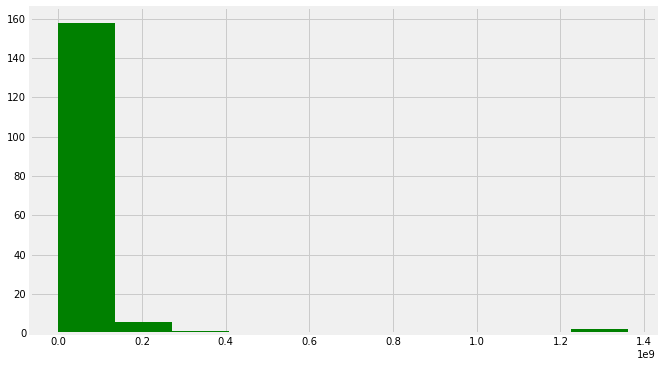

In [12]:
# let matlibplot choose the histogram bins
world_data['population'].hist(figsize=(10,6),color='green')

In [13]:
# see what countries are represented by the outliers at the right end of the histogram
world_sorted = world_data.sort_values('population', ascending = False)
world_sorted.head()

,name,births in 2014,billionaires,government debt,private wealth (bn),population,gdp (bn)
31,China,16329000,272,2125.9,21404,1360724000,9490.6
68,India,25416000,100,1260.8,3604,1270819000,1861.8
158,United States,4264000,571,17024.7,83708,327985000,16768.1
69,Indonesia,4576000,19,227.8,1550,240868000,910.5
19,Brazil,3012000,61,1409.2,3194,200777000,2392.1


This dataset has 2 outliers (China & India)

In [14]:
# remove the outliers (China & India) so our data can tell a better story
no_outliers = world_sorted.drop(world_sorted.index[[0,1]])
no_outliers.head()

,name,births in 2014,billionaires,government debt,private wealth (bn),population,gdp (bn)
158,United States,4264000,571,17024.7,83708,327985000,16768.1
69,Indonesia,4576000,19,227.8,1550,240868000,910.5
19,Brazil,3012000,61,1409.2,3194,200777000,2392.1
114,Pakistan,4980000,0,149.4,477,199206000,232.3
10,Bangladesh,3440000,0,27.0,212,172019000,150.0


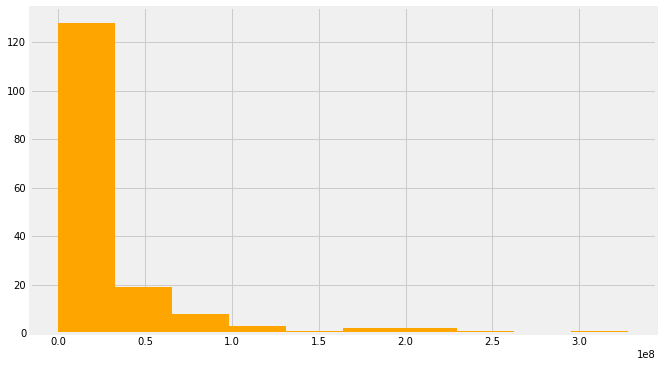

In [15]:
# let matlibplot choose the histogram bins again
no_outliers['population'].hist(figsize=(10,6),color='orange')

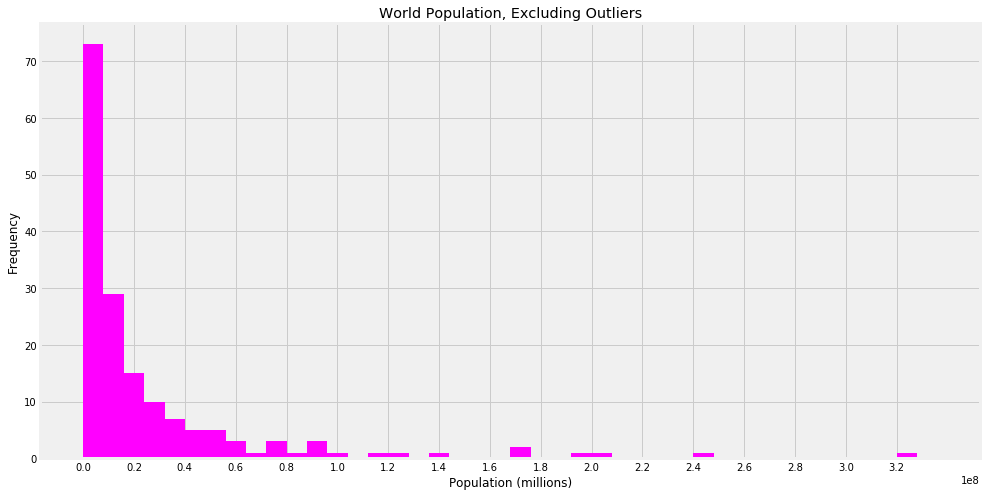

In [16]:
# choose our own bins for the data without outliers
plt.figure(figsize = (15,8))
plt.title('World Population, Excluding Outliers')
plt.xticks(np.arange(0, 3.4e8, 20000000))
n, bins, patches = plt.hist(no_outliers['population'],bins=np.arange(0,3.4e8,0.08e8),color='magenta')
plt.xlabel('Population (millions)')
plt.ylabel('Frequency')
plt.grid('on')

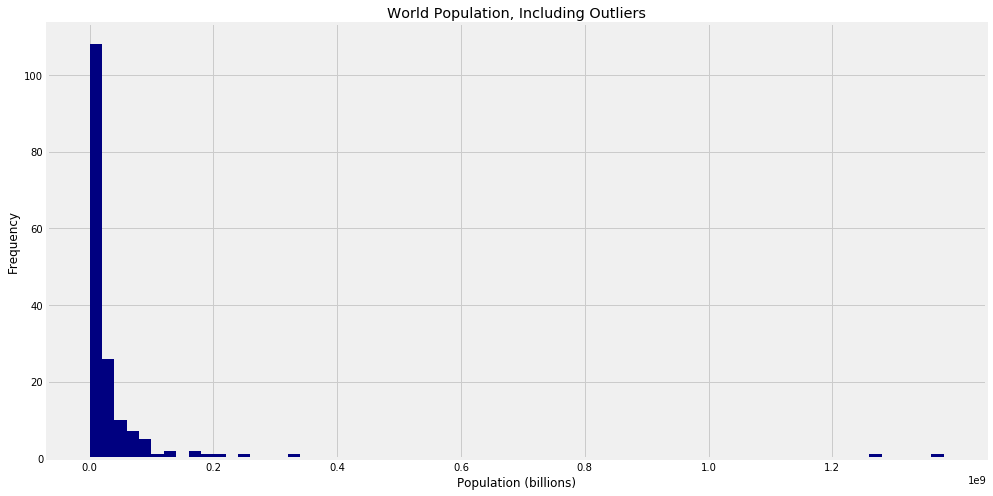

In [17]:
# now make a plot including the outliers (China & India)
plt.figure(figsize = (15,8))
plt.title('World Population, Including Outliers')
plt.xticks(np.arange(0, 1.4e9, 200000000))
n, bins, patches = plt.hist(world_data['population'],bins=np.arange(0,1.4e9,0.2e8),color='navy')
plt.xlabel('Population (billions)')
plt.ylabel('Frequency')
plt.grid('on')

## Example 3: Pie chart of Philadelphia school types

Draw a pie chart of the # of different schools in the city sliced by different education levels. Categorize the data as Elementary, Middle, High and Other. No other categories allowed. If a school offers both elementary education and middle school education it should be counted in both of those categories.

Dataset obtained from: https://www.opendataphilly.org/dataset/schools/resource/8e1bb3e6-7fb5-4018-95f8-63b3fc420557

In [18]:
schools = pd.read_csv('/Users/naomi/Downloads/Schools.csv')
schools.head()

,X,Y,OBJECTID,AUN,SCHOOL_NUM,LOCATION_ID,FACIL_NAME,FACILNAME_LABEL,FACIL_ADDRESS,ZIPCODE,FACIL_TELEPHONE,ACTIVE,GRADE_LEVEL,GRADE_ORG,ENROLLMENT,TYPE,TYPE_SPECIFIC
0,-75.194310,39.966598,1,126515001.0,3611.0,1360.0,Morton McMichael School,"McMichael, Morton",3543 Fairmount Ave,19104 - 1906,(215) 400-7750,Open,Elem/Middle,K-8,405.0,District,District
1,-75.216405,39.954368,2,126515001.0,6530.0,1340.0,Henry C Lea School,"Lea, Henry C.",4700 Locust St.,19139 - 4416,(215) 400-7660,Open,Elem/Middle,K-8,527.0,District,District
2,-75.156100,39.929828,3,126515001.0,3647.0,2580.0,Eliza B Kirkbride School,"Kirkbride, Elizabeth B.",1501 S 7th St,19147 - 6410,(215) 952-6214,Open,Elem/Middle,K-8,556.0,District,District
3,-75.181226,39.929387,4,126515001.0,3629.0,2370.0,Delaplaine McDaniel School,"McDaniel, Delaplaine",1801 S 22nd St,19145 - 1933,(215) 952-6380,Open,Elem/Middle,K-8,603.0,District,District
4,-75.160571,39.920896,5,126515001.0,7228.0,2540.0,Francis Scott Key School,"Key, Francis Scott",2230 S 8th St,19148 - 3101,(215) 952-6216,Open,Elementary School,K-6,467.0,District,District


In [19]:
# do some data cleaning!

# first get rid of NaN values in the GRADE_LEVEL column
schools = schools.dropna(subset = ['GRADE_LEVEL'])

In [20]:
# then find the unique types of schools in Philly
schools.GRADE_LEVEL.unique()

array(['Elem/Middle', 'Elementary School', 'Special Center',
       'Middle School', 'High School', 'Middle/High',
       'Remedial Discipline', 'Elem/Mid/High', 'Elementary',
       'Kindergarten', 'Ungraded', 'Vo-tech', 'Pre-K', 'Pre-school',
       'Elem/Middle/High', 'Middle/High School', 'Tutoring', 'Preschool',
       'Therapeutic'], dtype=object)

In [21]:
# make a function that returns the school type in a standardized fashion

def get_level(school):
    if school == 'Middle School':
        return 'Middle'
    elif school == 'High School':
        return 'High'
    elif school == 'Elementary School':
        return 'Elementary'
    elif school == 'Elem/Middle':
        return 'Elem/Middle'
    elif school == ('Middle/High' or 'Middle/High School'):
        return 'Middle/High'
    elif school == ('Elem/Mid/High' or 'Elem/Middle/High'):
        return 'All'
    else:
        return 'Other'

In [22]:
schools['Level'] = schools['GRADE_LEVEL'].apply(get_level)

In [23]:
# calculate the total number of each school type

elementary = schools[schools.Level.str.contains('Elem')|schools.Level.str.contains('All')]
len(elementary)

352

In [24]:
middle = schools[schools.Level.str.contains('Middle')|schools.Level.str.contains('All')]
len(middle)

306

In [25]:
high = schools[schools.Level.str.contains('High')|schools.Level.str.contains('All')]
len(high)

144

In [26]:
other = schools[schools.Level.str.contains('Other')]
len(other)

68

In [27]:
# make a new dataframe out of this information
new_schools_df = pd.DataFrame(data = [352,306,144,68], index=['Elementary', 'Middle', 'High', 'Other'],columns=['Number'])
new_schools_df

,Number
Elementary,352
Middle,306
High,144
Other,68


([<matplotlib.patches.Wedge at 0x1118686a0>,
  <matplotlib.text.Text at 0x111964550>])

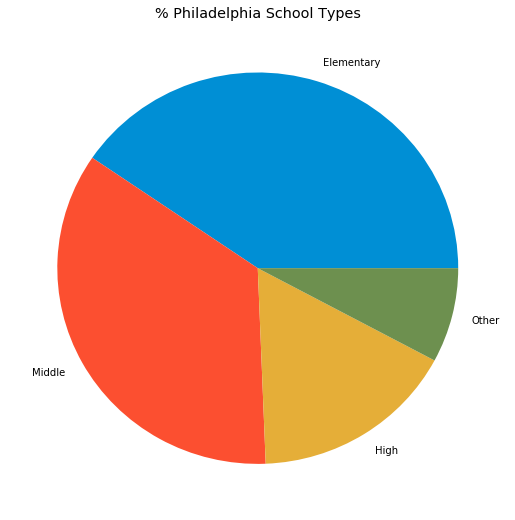

In [36]:
# make a pie chart

# size the figure
plt.figure(figsize=(8,9))

# give it a title
plt.title('% Philadelphia School Types', size = 'x-large')

# plot the data
plt.pie(new_schools_df['Number'], labels=['Elementary', 'Middle', 'High','Other'])

## Example 4: Find average Philadelphia school enrollment by zipcode

In [37]:
schools.head()

,X,Y,OBJECTID,AUN,SCHOOL_NUM,LOCATION_ID,FACIL_NAME,FACILNAME_LABEL,FACIL_ADDRESS,ZIPCODE,FACIL_TELEPHONE,ACTIVE,GRADE_LEVEL,GRADE_ORG,ENROLLMENT,TYPE,TYPE_SPECIFIC,Level,zip
0,-75.194310,39.966598,1,126515001.0,3611.0,1360.0,Morton McMichael School,"McMichael, Morton",3543 Fairmount Ave,19104 - 1906,(215) 400-7750,Open,Elem/Middle,K-8,405.0,District,District,Elem/Middle,19104
1,-75.216405,39.954368,2,126515001.0,6530.0,1340.0,Henry C Lea School,"Lea, Henry C.",4700 Locust St.,19139 - 4416,(215) 400-7660,Open,Elem/Middle,K-8,527.0,District,District,Elem/Middle,19139
2,-75.156100,39.929828,3,126515001.0,3647.0,2580.0,Eliza B Kirkbride School,"Kirkbride, Elizabeth B.",1501 S 7th St,19147 - 6410,(215) 952-6214,Open,Elem/Middle,K-8,556.0,District,District,Elem/Middle,19147
3,-75.181226,39.929387,4,126515001.0,3629.0,2370.0,Delaplaine McDaniel School,"McDaniel, Delaplaine",1801 S 22nd St,19145 - 1933,(215) 952-6380,Open,Elem/Middle,K-8,603.0,District,District,Elem/Middle,19145
4,-75.160571,39.920896,5,126515001.0,7228.0,2540.0,Francis Scott Key School,"Key, Francis Scott",2230 S 8th St,19148 - 3101,(215) 952-6216,Open,Elementary School,K-6,467.0,District,District,Elementary,19148


In [40]:
# drop NaN values in the Enrollment column
schools = schools.dropna(subset = ['ENROLLMENT'])

In [41]:
# clean up the zipcodes to remove the last 4 digits- this will make our chart easier to scan for useful information
def get_zip(zipcode):
    return zipcode[0:5]

In [44]:
# create a new column called 'zip' in our dataframe of the cleaned zipcodes
schools['zip'] = schools['ZIPCODE'].apply(get_zip)

In [45]:
# Create a pivot table of enrollment data by zipcode. This takes the mean of each zipcode by default.
schools_pivot = schools.pivot_table('ENROLLMENT',index = 'zip')
schools_pivot.head()

,ENROLLMENT
zip,
19102,575.000000
19103,397.400000
19104,240.166667
19106,486.800000
19107,424.500000


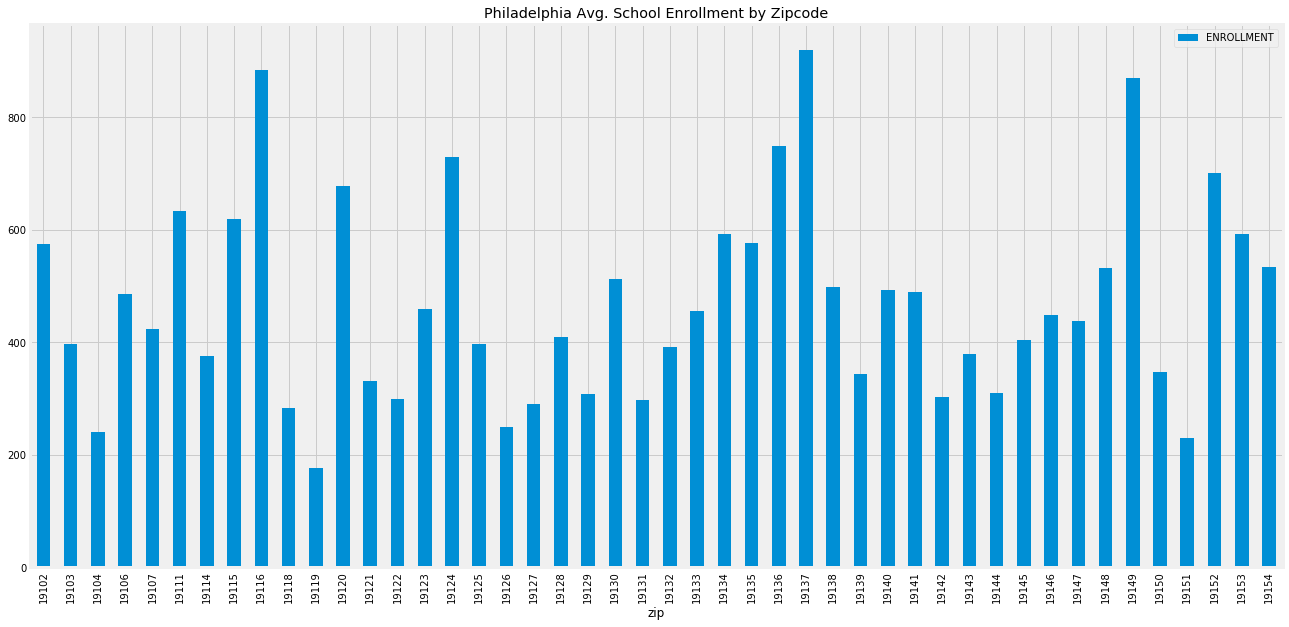

In [46]:
# make a bar graph from this pivot table data
schools_pivot.plot(kind='bar', figsize=(20,10), title="Philadelphia Avg. School Enrollment by Zipcode")

## Example 5: Make a double histogram of best actor/actress winners' ages (Oscars)

We can use this double histogram to identify trends in ages for male and female winners- do men or women typically win Oscars earlier or later in life?

Dataset obtained from: https://www.statcrunch.com/app/index.php?dataid=1914106

In [47]:
acting = pd.read_csv('/Users/naomi/Downloads/acting.csv')
acting.head()

,Year,Male Age,Actor,Male Movie,Female Age,Actress,Female Movie,Unnamed: 7
0,1928,44,Emil Jannings,The Last Command,22,Laura Gainor (aka Janet Gaynor),Sunrise,NaN
1,1929,38,Warner Baxter,In Old Arizona,37,Mary Pickford,Coquette,NaN
2,1930,62,George Arliss,Disraeli,30,Norma Shearer,The Divorcee,NaN
3,1931,53,Lionel Barrymore,A Free Soul,62,Marie Dressler,Min and Bill,NaN
4,1932,41,W. Beery(47)/F. March(35)*,The Champ/Dr. Jekyll and Mr. Hyde,32,Helen Hayes,Sin of Madelon,NaN


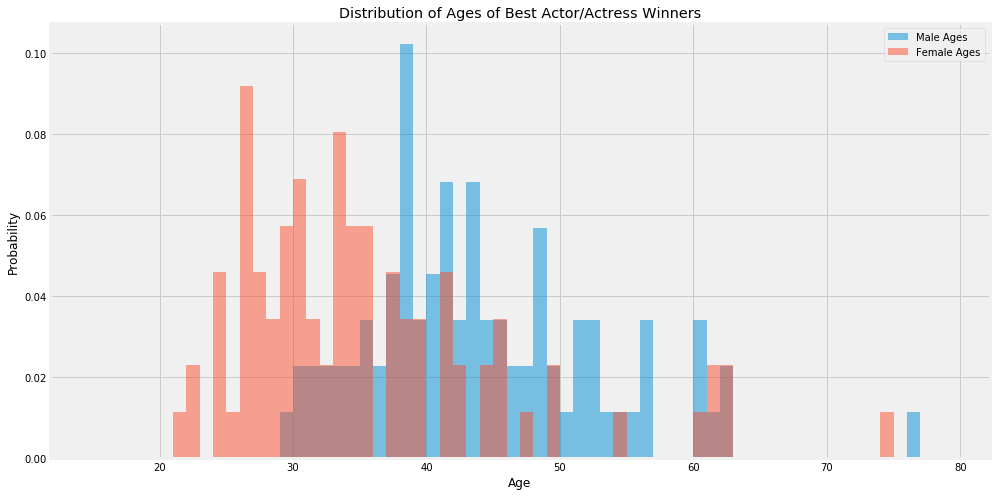

In [48]:
x = acting['Male Age']
y = acting['Female Age']

bins = np.arange(15,80)

plt.figure(figsize = (15,8))
plt.hist(x, bins, alpha=0.5, label='Male Ages', normed=True)
plt.hist(y, bins, alpha=0.5, label='Female Ages', normed=True)
plt.legend(loc='upper right')
plt.title('Distribution of Ages of Best Actor/Actress Winners')
plt.xlabel('Age')
plt.ylabel('Probability')

# I used the following stackoverflow article to figure out how to plot two histograms on the same plot: 
# https://stackoverflow.com/questions/6871201/plot-two-histograms-at-the-same-time-with-matplotlib

Based on this graph, we can see that females generally win Best Actor/Actress Awards earlier than men do. The most common age for women to win is ~26, whereas the most common age for men to win is ~38. There are some outliers in the 70-80 age range- a few men and women won these awards later in life.

## Example 6: Philadelphia vs. San Diego weather

This set of visualizations aims to answer the question: Is the weather really better on the West Coast?!

I used this data for San Diego (from handy dandy Wunderground):
https://www.wunderground.com/history/airport/KSAN/2016/1/1/CustomHistory.html?dayend=1&monthend=1&yearend=2017&req_city=&req_state=&req_statename=&reqdb.zip=&reqdb.magic=&reqdb.wmo=

And this data for Philadelphia:
https://www.wunderground.com/history/airport/KPHL/2016/1/1/CustomHistory.html?dayend=1&monthend=1&yearend=2017&req_city=&req_state=&req_statename=&reqdb.zip=&reqdb.magic=&reqdb.wmo=

I uploaded both datasets into Google Sheets and did some preliminary data cleaning in there. Here are links to my cleaned Google sheets:

Cleaned SD data:
https://docs.google.com/spreadsheets/d/1jwqgf48k675m9ZBmgVislopcrbXA7_yZKebFe6Kp0Wo/edit?usp=sharing

Cleaned Philadelphia data:
https://docs.google.com/spreadsheets/d/1m-VQ0avVkGD4WAbHpEjP4yPs3JKzp3LV9OuPhwolCWg/edit?usp=sharing

In [49]:
phl = pd.read_csv('/Users/naomi/Downloads/PHL_data - Sheet1.csv')
phl.head()

,Date,Temp. High (F),Temp. Avg (F),Temp. Low (F),Humid. High (%),Humid. Avg (%),Humid. Low (%),Wind High (mph),Wind Avg. (mph),Wind Low (mph),Precip. (in),Events
0,1-Jan,43,39,34,59,50,41,24,12,29,0,NaN
1,2-Jan,44,38,31,69,55,40,17,7,22,0,NaN
2,3-Jan,50,40,30,85,58,31,22,9,28,0,NaN
3,4-Jan,37,26,14,64,45,26,26,16,34,0,NaN
4,5-Jan,32,22,12,51,36,21,21,9,26,0,NaN


In [50]:
sd = pd.read_csv('/Users/naomi/Downloads/SD_data - Sheet1.csv')
sd.head()

,Date,Temp. High (F),Temp. Avg (F),Temp. Low (F),Humid. High (%),Humid. Avg (%),Humid. Low (%),Wind High (mph),Wind Avg. (mph),Wind Low (mph),Precip. (in),Events
0,1-Jan,65,55,44,58,38,17,9,1,10,0,NaN
1,2-Jan,64,55,45,66,46,25,7,2,10,0,NaN
2,3-Jan,63,56,48,69,62,54,17,4,22,T,NaN
3,4-Jan,64,60,56,84,70,55,15,5,18,0.14,Rain
4,5-Jan,61,60,58,93,80,67,24,11,31,1.65,Rain


In [51]:
# define "nice days" as days where the avg temperature is between 70 and 85 degrees 
# and the avg humidity is less than 75%

# define "okay days" as days where the avg temperature is between 55 and 70 degrees
# and the avg humidity is less than 75%

def get_nice(humid, temp):
    if np.logical_and((humid<75),(np.logical_and(temp<=85,temp>=70))):
        return 'nice'
    elif np.logical_and((humid<75),(np.logical_and(temp<70,temp>=55))):
        return 'okay'
    else:
        return 'bad'

In [57]:
# create a column, day_type, of day type

phl['day_type'] = np.vectorize(get_nice)(phl['Humid. Avg (%)'], phl['Temp. Avg (F)'])
phl.head()

,Date,Temp. High (F),Temp. Avg (F),Temp. Low (F),Humid. High (%),Humid. Avg (%),Humid. Low (%),Wind High (mph),Wind Avg. (mph),Wind Low (mph),Precip. (in),Events,day_type
0,1-Jan,43,39,34,59,50,41,24,12,29,0,NaN,bad
1,2-Jan,44,38,31,69,55,40,17,7,22,0,NaN,bad
2,3-Jan,50,40,30,85,58,31,22,9,28,0,NaN,bad
3,4-Jan,37,26,14,64,45,26,26,16,34,0,NaN,bad
4,5-Jan,32,22,12,51,36,21,21,9,26,0,NaN,bad


In [56]:
# create a column, day_type, of day type

sd['day_type'] = np.vectorize(get_nice)(sd['Humid. Avg (%)'], sd['Temp. Avg (F)'])
sd.head()

,Date,Temp. High (F),Temp. Avg (F),Temp. Low (F),Humid. High (%),Humid. Avg (%),Humid. Low (%),Wind High (mph),Wind Avg. (mph),Wind Low (mph),Precip. (in),Events,day_type
0,1-Jan,65,55,44,58,38,17,9,1,10,0,NaN,okay
1,2-Jan,64,55,45,66,46,25,7,2,10,0,NaN,okay
2,3-Jan,63,56,48,69,62,54,17,4,22,T,NaN,okay
3,4-Jan,64,60,56,84,70,55,15,5,18,0.14,Rain,okay
4,5-Jan,61,60,58,93,80,67,24,11,31,1.65,Rain,bad


In [58]:
# count the number of good, okay, and bad days in PHL

phl_count = phl.pivot_table('Wind High (mph)', index = 'day_type', aggfunc = 'count')

In [59]:
# rename column

phl_count = phl_count.rename(columns = {'Wind High (mph)':'Count'})
phl_count

,Count
day_type,
bad,199
nice,103
okay,64


In [60]:
# count the number of good, okay, and bad days in SD

sd_count = sd.pivot_table('Wind High (mph)', index = 'day_type', aggfunc = 'count')

In [61]:
# rename column

sd_count = sd_count.rename(columns = {'Wind High (mph)':'Count'})

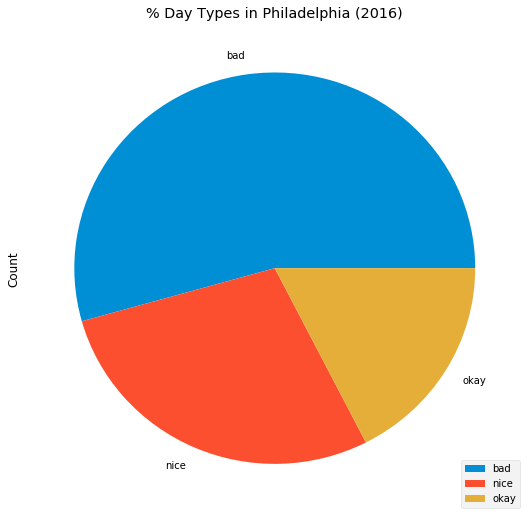

In [62]:
# make a pie chart for Philly data

phl_count.plot.pie('Count', legend='day_type', title='% Day Types in Philadelphia (2016)',figsize=(8,9))

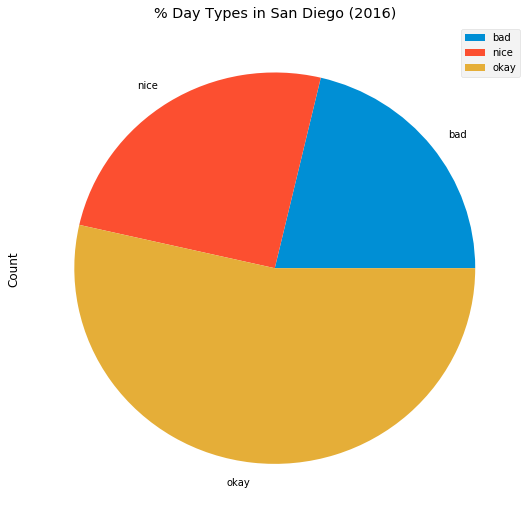

In [63]:
# make a pie chart for San Diego data

sd_count.plot.pie('Count', legend='day_type', title='% Day Types in San Diego (2016)',figsize=(8,9))

Based on these pie charts, the viewer can see that San Diego has many more 'nice' and 'okay' days than Philadelphia does. Specifically, San Diego has more days that are between 55-85 degrees F with humidity lower than 75% than Philadelphia does. This makes San Diego a nicer city to live in, based on weather. I still love Philly, though.

## Example 7: More weather!

In [64]:
# Now look at the percentage of days with precipitation in each city (I'm counting fog as precipitation).

phl.Events.unique()

array([nan, 'Rain', 'Snow', 'Fog , Snow', 'Rain , Snow', 'Fog , Rain',
       'Fog , Rain , Snow', 'Rain , Thunderstorm',
       'Fog , Rain , Thunderstorm', 'Thunderstorm', 'Fog'], dtype=object)

In [65]:
sd.Events.unique()

array([nan, 'Rain', 'Rain , Thunderstorm', 'Fog', 'Fog , Rain'], dtype=object)

In [68]:
# replace NaN values with strings and save this to a new dataframe

phl2 = phl.fillna(value='None')

In [69]:
sd2 = sd.fillna(value='None')

In [70]:
# calculate the total number of each Event type in Philly

phl_rain = phl2[phl2.Events.str.contains('Rain')]
len(phl_rain)

136

In [71]:
phl_snow = phl2[phl2.Events.str.contains('Snow')]
len(phl_snow)

23

In [72]:
phl_tstorm = phl2[phl2.Events.str.contains('Thunderstorm')]
len(phl_tstorm)

26

In [73]:
phl_fog = phl2[phl2.Events.str.contains('Fog')]
len(phl_fog)

14

In [74]:
phl_none = phl2[phl2.Events.str.contains('None')]
len(phl_none)

213

In [75]:
# calculate the total number of each event type in San Diego

sd_rain = sd2[sd2.Events.str.contains('Rain')]
len(sd_rain)

53

In [76]:
sd_snow = sd2[sd2.Events.str.contains('Snow')]
len(sd_snow)

0

In [77]:
sd_tstorm = sd2[sd2.Events.str.contains('Thunderstorm')]
len(sd_tstorm)

5

In [78]:
sd_fog = sd2[sd2.Events.str.contains('Fog')]
len(sd_fog)

20

In [79]:
sd_none = sd2[sd2.Events.str.contains('None')]
len(sd_none)

295

In [80]:
# create some new dataframes from this data!

phl_weather = pd.DataFrame(data = [136,23,26,14,213], index=['Rain', 'Snow', 'Thunderstorm', 'Fog','None'], columns = ['Event Count'])
phl_weather

,Event Count
Rain,136
Snow,23
Thunderstorm,26
Fog,14
None,213


In [81]:
# don't include snow in sd_weather table because San Diego had no snow in 2016

sd_weather = pd.DataFrame(data = [53,5,20,295], index=['Rain', 'Thunderstorm', 'Fog','None'], columns = ['Event Count'])
sd_weather

,Event Count
Rain,53
Thunderstorm,5
Fog,20
None,295


([<matplotlib.patches.Wedge at 0x11301ab70>,
  <matplotlib.text.Text at 0x11303d4a8>])

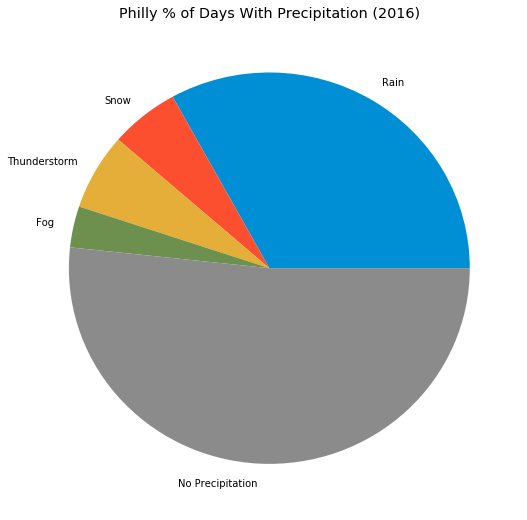

In [82]:
# finally, make some pie charts!

#size the figure
plt.figure(figsize=(8,9))

#give it a title
plt.title('Philly % of Days With Precipitation (2016)', size = 'x-large')

#plot the data
plt.pie(phl_weather['Event Count'], labels=['Rain', 'Snow', 'Thunderstorm','Fog','No Precipitation'])

([<matplotlib.patches.Wedge at 0x1131c4160>,
  <matplotlib.text.Text at 0x1131d4e10>])

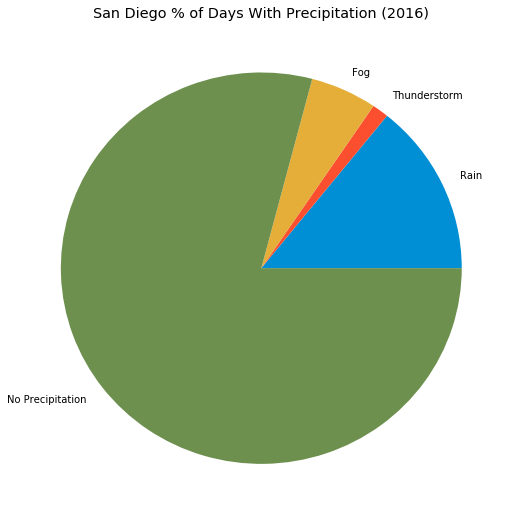

In [83]:
#size another figure
plt.figure(figsize=(8,9))

#give it another title
plt.title('San Diego % of Days With Precipitation (2016)', size = 'x-large')

#plot the data
plt.pie(sd_weather['Event Count'], labels=['Rain','Thunderstorm','Fog','No Precipitation'])

We can see from these pie charts that San Diego has far fewer days of precipitation than Philadelphia (if we count fog as precipitation). Also, San Diego had 0 days of snow in 2016! This also makes SD seem like a better city to live in than Philadelphia, based on weather. *sigh*